# **Accuracy Score and Confusion Matrix**

> In *Classification*, **Accuracy Score** is the ratio of number of correct predictions to the total number of input data points.

> Accuracy Score = (Number of correct predictions / Total Number of data points) x 100%

> **Limitation of Accuracy Score:**
Accuracy Score is not reliable when the dataset has an uneven distribution of classes


> **Confusion Matrix:**
Confusion Matrix is a matrix used for evaluating the performance of a ***Classification Model***. It gives more information than the accuracy score.

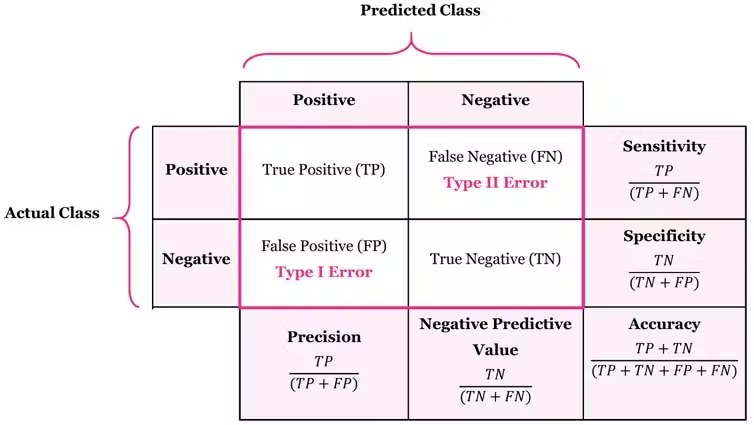

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

**Data Collection and Preprocessing**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/heart.csv")
df.shape

(1025, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.target.value_counts()

,count
target,
1,526
0,499


**Splitting Input features and Target labels**

In [8]:
X = df.drop(columns="target", axis=1)
Y = df["target"]

**Training Testing Dataset Splitting**

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.09, stratify=Y, random_state=23)

In [10]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (932, 13) (93, 13)


**Model Training**

In [11]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

**Model Accuracy Evaluation on Training Dataset**

In [12]:
Y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Accuracy score on training data: {train_accuracy:.2%}")

Accuracy score on training data: 85.41%


**Model Accuracy Evaluation on Testing Dataset**

In [13]:
Y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Accuracy score on test data: {test_accuracy:.2%}")

Accuracy score on test data: 84.95%


**Confusion Matrix**

In [14]:
conf_mat = confusion_matrix(Y_test, Y_test_pred)
print(conf_mat)

[[34 11]
 [ 3 45]]


In [15]:
tn, fp, fn, tp = conf_mat.ravel()
print("True positive: ", tp)
print("True negative: ", tn)
print("False positive: ", fp)
print("False negative: ", fn)

True positive:  45
True negative:  34
False positive:  11
False negative:  3


<Axes: >

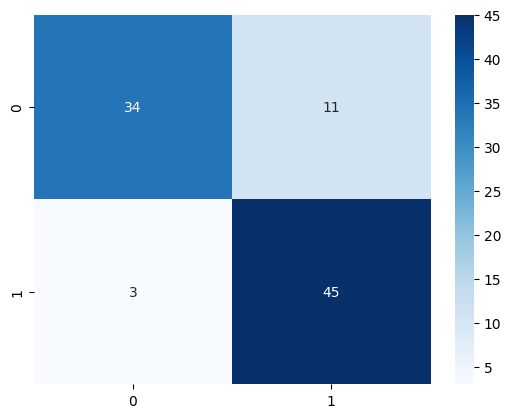

In [16]:
sns.heatmap(data=conf_mat, annot=True, cmap='Blues')

### **Performance Metrics**

**Precision**

1. Precision is the ratio of number of ***True Positive*** to the ***total number of Predicted Positive***.
2. It measures, out of the total predicted positive, how many are actually positive.
3. Precision measures the **error caused** by *False Positives*. Hence it is a good evaluation metric when False Positive predictions are critical.

*Example: Face Authentication*

In [17]:
# Precision score on Training dataset
precision_train = precision_score(Y_train, Y_train_pred)
print(f"Precision score on training data: {precision_train:.2%}")

Precision score on training data: 82.14%


In [18]:
# Precision score on Testing dataset
precision_test = precision_score(Y_test, Y_test_pred)
print(f"Precision score on test data: {precision_test:.2%}")

Precision score on test data: 80.36%


**Recall**

1. Recall is the ratio of number of **True Positive** to the **total number of Actual Positive.**
2. It measures, out of the total actual positive, how many are predicted as True Positive.
3. Recall measures the **error caused** by *False Negatives*. Hence it is a good evaluation metric when False Negative predictions are critical.

*Example: Cancer Diagnosis*

In [19]:
# Recall score on Training Dataset
recall_train = recall_score(Y_train, Y_train_pred)
print(f"Recall score on training data: {recall_train:.2%}")

Recall score on training data: 91.42%


In [20]:
# Recall score on Testing Dataset
recall_test = recall_score(Y_test, Y_test_pred)
print(f"Recall score on test data: {recall_test:.2%}")

Recall score on test data: 93.75%


**F1 Score**

1. *F1 Score* is an important evaluation metric for binary classification that combines **Precision & Recall.**
2. F1 Score is the harmonic mean of Precision & Recall.
3. This is a very useful metric when a dataset has imbalanced classes.

F1 Score = (2 x Precision x Recall / Precision + Recall)

In [21]:
# F1 Score on Trainig Dataset
f1_train = f1_score(Y_train, Y_train_pred)
print(f"F1 score on training data: {f1_train:.2%}")

F1 score on training data: 86.53%


In [22]:
# F1 Score on Testing Dataset
f1_test = f1_score(Y_test, Y_test_pred)
print(f"F1 score on test data: {f1_test:.2%}")

F1 score on test data: 86.54%
